In [462]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Python용 데이터분석 라이브러리
# Excel과 같이, 행과 열로 구성된 데이터 객체를 다룸

import torch
import matplotlib.pyplot as plt

In [463]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/ColabNotebooks'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/ColabNotebooks/movies_metadata.csv
/content/drive/MyDrive/ColabNotebooks/ratings_small.csv
/content/drive/MyDrive/ColabNotebooks/keywords.csv
/content/drive/MyDrive/ColabNotebooks/fb.txt
/content/drive/MyDrive/ColabNotebooks/[과제 1] 20191584 남상림.ipynb
/content/drive/MyDrive/ColabNotebooks/20191584_남상림 X.ipynb
/content/drive/MyDrive/ColabNotebooks/20191584_남상림.ipynb
/content/drive/MyDrive/ColabNotebooks/데이터 과학 0907.ipynb
/content/drive/MyDrive/ColabNotebooks/L01: Data Visualization.ipynb
/content/drive/MyDrive/ColabNotebooks/L02: Basic Linear Algebra.ipynb
/content/drive/MyDrive/ColabNotebooks/L03: Probability and Statistics.ipynb
/content/drive/MyDrive/ColabNotebooks/Linear Regression.ipynb
/content/drive/MyDrive/ColabNotebooks/L04.1: Linear Regression Practice.ipynb
/content/drive/MyDrive/ColabNotebooks/L05.1: Logistic Regression Practice.ipynb
/content/drive/MyDrive/ColabNotebooks/Logistic Regression 1003.ipynb
/content/drive/MyDrive/Co

In [464]:
meta = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/owid-covid-data-2.csv")
meta

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127812,ZWE,Africa,Zimbabwe,2021-10-28,132880.0,72.0,48.571,4675.0,0.0,1.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
127813,ZWE,Africa,Zimbabwe,2021-10-29,132926.0,46.0,48.286,4675.0,0.0,1.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
127814,ZWE,Africa,Zimbabwe,2021-10-30,132926.0,0.0,48.286,4675.0,0.0,1.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
127815,ZWE,Africa,Zimbabwe,2021-10-31,132977.0,51.0,46.571,4678.0,3.0,1.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [465]:
# meta.date

meta.date = pd.to_datetime(meta.date)
meta.date

0        2020-02-24
1        2020-02-25
2        2020-02-26
3        2020-02-27
4        2020-02-28
            ...    
127812   2021-10-28
127813   2021-10-29
127814   2021-10-30
127815   2021-10-31
127816   2021-11-01
Name: date, Length: 127817, dtype: datetime64[ns]

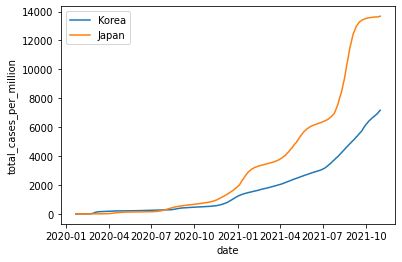

In [466]:
K = meta.loc[meta['location'] == 'South Korea', :][['date', 'total_cases_per_million']].dropna()
J = meta.loc[meta['location'] == 'Japan', :][['date', 'total_cases_per_million']].dropna()
plt.plot(K.date, K.total_cases_per_million, label="Korea")
plt.plot(J.date, J.total_cases_per_million, label="Japan")

plt.xlabel('date')
plt.ylabel('total_cases_per_million')

plt.legend(loc="upper left")

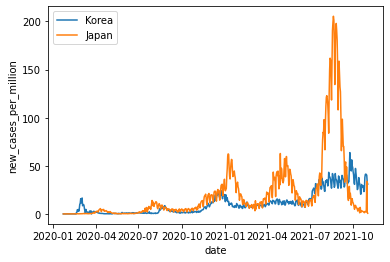

In [467]:
K = meta.loc[meta['location'] == 'South Korea', :][['date', 'new_cases_per_million']].dropna()
J = meta.loc[meta['location'] == 'Japan', :][['date', 'new_cases_per_million']].dropna()

plt.plot(K.date, K.new_cases_per_million, label="Korea")
plt.plot(J.date, J.new_cases_per_million, label="Japan")
plt.xlabel('date')
plt.ylabel('new_cases_per_million')

plt.legend(loc="upper left")

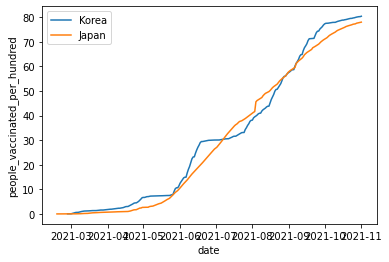

In [468]:
K = meta.loc[meta['location'] == 'South Korea', :][['date', 'people_vaccinated_per_hundred']].dropna()
J = meta.loc[meta['location'] == 'Japan', :][['date', 'people_vaccinated_per_hundred']].dropna()

plt.plot(K.date, K.people_vaccinated_per_hundred, label="Korea")
plt.plot(J.date, J.people_vaccinated_per_hundred, label="Japan")

plt.xlabel('date')
plt.ylabel('people_vaccinated_per_hundred')

plt.legend(loc="upper left")

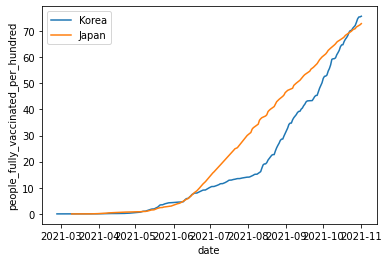

In [469]:
K = meta.loc[meta['location'] == 'South Korea', :][['date', 'people_fully_vaccinated_per_hundred']].dropna()
J = meta.loc[meta['location'] == 'Japan', :][['date', 'people_fully_vaccinated_per_hundred']].dropna()

plt.plot(K.date, K.people_fully_vaccinated_per_hundred, label="Korea")
plt.plot(J.date, J.people_fully_vaccinated_per_hundred, label="Japan")

plt.xlabel('date')
plt.ylabel('people_fully_vaccinated_per_hundred')

plt.legend(loc="upper left")

In [470]:
task3 = meta[['location', 'date', 'total_deaths_per_million', 'total_cases_per_million', 'people_vaccinated_per_hundred', 'human_development_index']]
task3

,location,date,total_deaths_per_million,total_cases_per_million,people_vaccinated_per_hundred,human_development_index
0,Afghanistan,2020-02-24,NaN,0.126,NaN,0.511
1,Afghanistan,2020-02-25,NaN,0.126,NaN,0.511
2,Afghanistan,2020-02-26,NaN,0.126,NaN,0.511
3,Afghanistan,2020-02-27,NaN,0.126,NaN,0.511
4,Afghanistan,2020-02-28,NaN,0.126,NaN,0.511
...,...,...,...,...,...,...
127812,Zimbabwe,2021-10-28,309.763,8804.565,21.91,0.571
127813,Zimbabwe,2021-10-29,309.763,8807.613,21.97,0.571
127814,Zimbabwe,2021-10-30,309.763,8807.613,22.00,0.571
127815,Zimbabwe,2021-10-31,309.962,8810.992,22.02,0.571


In [471]:
task3_2 = task3.groupby('location').max()
# task3_2 = pd.merge(task3, cond, on=['location', 'date'], how="inner")
task3_2

,date,total_deaths_per_million,total_cases_per_million,people_vaccinated_per_hundred,human_development_index
location,,,,,
Afghanistan,2021-11-01,182.777,3923.241,6.06,0.511
Africa,2021-11-01,159.008,6191.136,8.93,NaN
Albania,2021-11-01,1020.211,64567.094,35.29,0.795
Algeria,2021-11-01,132.776,4629.799,14.26,0.748
Andorra,2021-11-01,1680.585,200584.327,70.30,0.868
...,...,...,...,...,...
Wallis and Futuna,2021-11-01,NaN,NaN,53.52,NaN
World,2021-11-01,635.699,31383.570,49.63,0.737
Yemen,2021-11-01,61.986,321.377,1.07,0.470


In [472]:
new_task = task3_2[['people_vaccinated_per_hundred', 'total_deaths_per_million', 'total_cases_per_million']].dropna()
new_task

,people_vaccinated_per_hundred,total_deaths_per_million,total_cases_per_million
location,,,
Afghanistan,6.06,182.777,3923.241
Africa,8.93,159.008,6191.136
Albania,35.29,1020.211,64567.094
Algeria,14.26,132.776,4629.799
Andorra,70.30,1680.585,200584.327
...,...,...,...
Vietnam,58.40,225.438,9440.064
World,49.63,635.699,31383.570
Yemen,1.07,61.986,321.377


In [473]:
p1 = new_task.people_vaccinated_per_hundred

In [474]:
p2 = new_task.total_deaths_per_million / new_task.total_cases_per_million

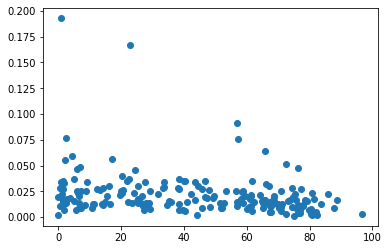

In [475]:
plt.scatter(p1, p2)

In [476]:
def pearson_similarity(u1, u2):
    # mean()->비어있지 않은 값들의 평균을 구해줌
    # 평균값을 빼서 축을 옮겨주는 역할
    u1_c = u1 - u1.mean() 
    u2_c = u2 - u2.mean()
    
    
    denom = np.sqrt(np.sum(u1_c ** 2) * np.sum(u2_c ** 2))
    
    if denom != 0:
        return np.sum(u1_c * u2_c)/denom
    else:
        return 0

In [491]:
pearson_similarity(p1, p2)

-0.25282394242906525

In [492]:
vaccinated_rating = task3_2['people_vaccinated_per_hundred']
HDI = task3_2['human_development_index']

pearson_similarity(vaccinated_rating, HDI)

0.7250351729877786

In [509]:
task4_2 = task3_2.dropna()
x = torch.tensor(task4_2['human_development_index'], dtype=torch.float)
y = torch.tensor(task4_2['people_vaccinated_per_hundred'], dtype=torch.float)

x = x.unsqueeze(1)
y = y.unsqueeze(1)

W = torch.zeros(1, 1)
b = torch.zeros(1, 1)

lr = 0.08 #learning rate

for epoch in range(3001):

  # W, b 값을 반복해서 업데이트
  W.requires_grad_(True)
  b.requires_grad_(True)

  # 가설 Hypothesis H(x) = wx + b
  h = torch.mm(x, W) + b
  cost = torch.mean((h - y) ** 2) # mse <-> 루트까지 씌우면 rmse=torch.mean((h - y) ** 2) ** 0.5 

  # cost에 대해서 미분 실행하여 기울기 구함
  cost.backward()

  with torch.no_grad(): # 기울기에 전혀 영향을 미치지 않음
    W = W - lr * W.grad # 기울기에 lr 곱한 만큼 이동해서 값을 업데이트
    b = b - lr * b.grad

    if epoch % 100 == 0:
      print(f"W: {W}, b: {b}, cost: {cost}")

W: tensor([[5.4426]]), b: tensor([[6.7524]]), cost: 2536.593994140625
W: tensor([[48.3811]]), b: tensor([[8.2085]]), cost: 481.9288635253906
W: tensor([[69.8190]]), b: tensor([[-7.5772]]), cost: 392.6051940917969
W: tensor([[86.7485]]), b: tensor([[-20.0431]]), cost: 336.9010009765625
W: tensor([[100.1176]]), b: tensor([[-29.8874]]), cost: 302.1626281738281
W: tensor([[110.6752]]), b: tensor([[-37.6615]]), cost: 280.49896240234375
W: tensor([[119.0125]]), b: tensor([[-43.8006]]), cost: 266.9890441894531
W: tensor([[125.5965]]), b: tensor([[-48.6487]]), cost: 258.5638427734375
W: tensor([[130.7959]]), b: tensor([[-52.4772]]), cost: 253.30978393554688
W: tensor([[134.9018]]), b: tensor([[-55.5006]]), cost: 250.03318786621094
W: tensor([[138.1443]]), b: tensor([[-57.8882]]), cost: 247.98985290527344
W: tensor([[140.7048]]), b: tensor([[-59.7736]]), cost: 246.715576171875
W: tensor([[142.7269]]), b: tensor([[-61.2625]]), cost: 245.92086791992188
W: tensor([[144.3236]]), b: tensor([[-62.438

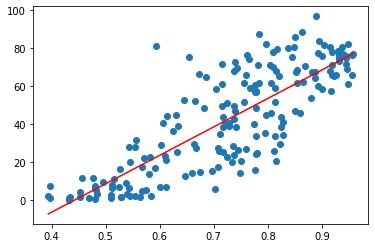

In [517]:
x_tmp = torch.linspace(HDI.min(), HDI.max(), 100).unsqueeze(1)
y_tmp = x_tmp * W + b

plt.plot(x_tmp, y_tmp, 'r-')

plt.scatter(HDI, vaccinated_rating)
plt.show()